<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>Capstone Project- ⚙️ Predictive Modelling </b></h1>
  </div>
</div>

<br>

##  Part 0: Load libraries
---

**We'll need the following libraries for this project:**
1. `pandas`
2. `numpy`
3. `matplotlib` and `seaborn`
4. `missingno` as `msno`
5. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
6. `train_test_split` from `sklearn`'s `model_selection` module
7. `StandardScaler` from `sklearn`'s `preprocessing` module
8. `ConfusionMatrixDisplay` from `sklearn`'s `metrics` module

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

## Part 1: **The Song Dataset**
---
> This data set contains over 10,000 songs with a popularity column with numerical values (0-100) with 0 being the lowest popularity score and 100 being the highest popularity score. Thirteen features were measuered for each song. I will make a Classification model based on this dataset to predict whether a song will fit into a song popularity category.

In [2]:
# Read in CSV and define dataframe
df = pd.read_csv('../data/song_data.csv')

# Let's take a quick look at the dataset
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [3]:
# How many rows and columns in the dataset? (shape)
df.shape

(18835, 15)

In [4]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
# looking at all data types
df.describe(include = 'all')

song_name  song_popularity  song_duration_ms  acousticness  \
count      18835     18835.000000      1.883500e+04  18835.000000   
unique     13070              NaN               NaN           NaN   
top       Better              NaN               NaN           NaN   
freq          21              NaN               NaN           NaN   
mean         NaN        52.991877      2.182116e+05      0.258539   
std          NaN        21.905654      5.988754e+04      0.288719   
min          NaN         0.000000      1.200000e+04      0.000001   
25%          NaN        40.000000      1.843395e+05      0.024100   
50%          NaN        56.000000      2.113060e+05      0.132000   
75%          NaN        69.000000      2.428440e+05      0.424000   
max          NaN       100.000000      1.799346e+06      0.996000   

        danceability        energy  instrumentalness           key  \
count   18835.000000  18835.000000      18835.000000  18835.000000   
unique           NaN           NaN               NaN           NaN   
top              NaN           NaN               NaN           NaN   
freq             NaN           NaN               NaN           NaN   
mean        0.633348      0.644995          0.078008      5.289196   
std         0.156723      0.214101          0.221591      3.614595   
min         0.000000      0.001070          0.000000      0.000000   
25%         0.533000      0.510000          0.000000      2.000000   
50%         0.645000      0.674000          0.000011      5.000000   
75%         0.748000      0.815000          0.002570      8.000000   
max         0.987000      0.999000          0.997000     11.000000   

            liveness      loudness    audio_mode   speechiness         tempo  \
count   18835.000000  18835.000000  18835.000000  18835.000000  18835.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.179650     -7.447435      0.628139      0.102099    121.073154   
std         0.143984      3.827831      0.483314      0.104378     28.714456   
min         0.010900    -38.768000      0.000000      0.000000      0.000000   
25%         0.092900     -9.044000      0.000000      0.037800     98.368000   
50%         0.122000     -6.555000      1.000000      0.055500    120.013000   
75%         0.221000     -4.908000      1.000000      0.119000    139.931000   
max         0.986000      1.585000      1.000000      0.941000    242.318000   

        time_signature  audio_valence  
count     18835.000000   18835.000000  
unique             NaN            NaN  
top                NaN            NaN  
freq               NaN            NaN  
mean          3.959119       0.527967  
std           0.298533       0.244632  
min           0.000000       0.000000  
25%           4.000000       0.335000  
50%           4.000000       0.527000  
75%           4.000000       0.725000  
max           5.000000       0.984000

## Part 2: **Data Cleaning**
---

> Let's see if our `DataFrame` requires any cleaning. In the cells below:
> 1. Check the `dtypes` to make sure every column is numerical
> 2. Check for null values

In [6]:
# data types
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [7]:
# we must drop the 'song_name' column before fitting a model
# df = df.drop(columns = 'song_name')

In [8]:
# Any missing data?
print(df.isnull().sum())
df.columns[df.isnull().any()]

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64


Index([], dtype='object')

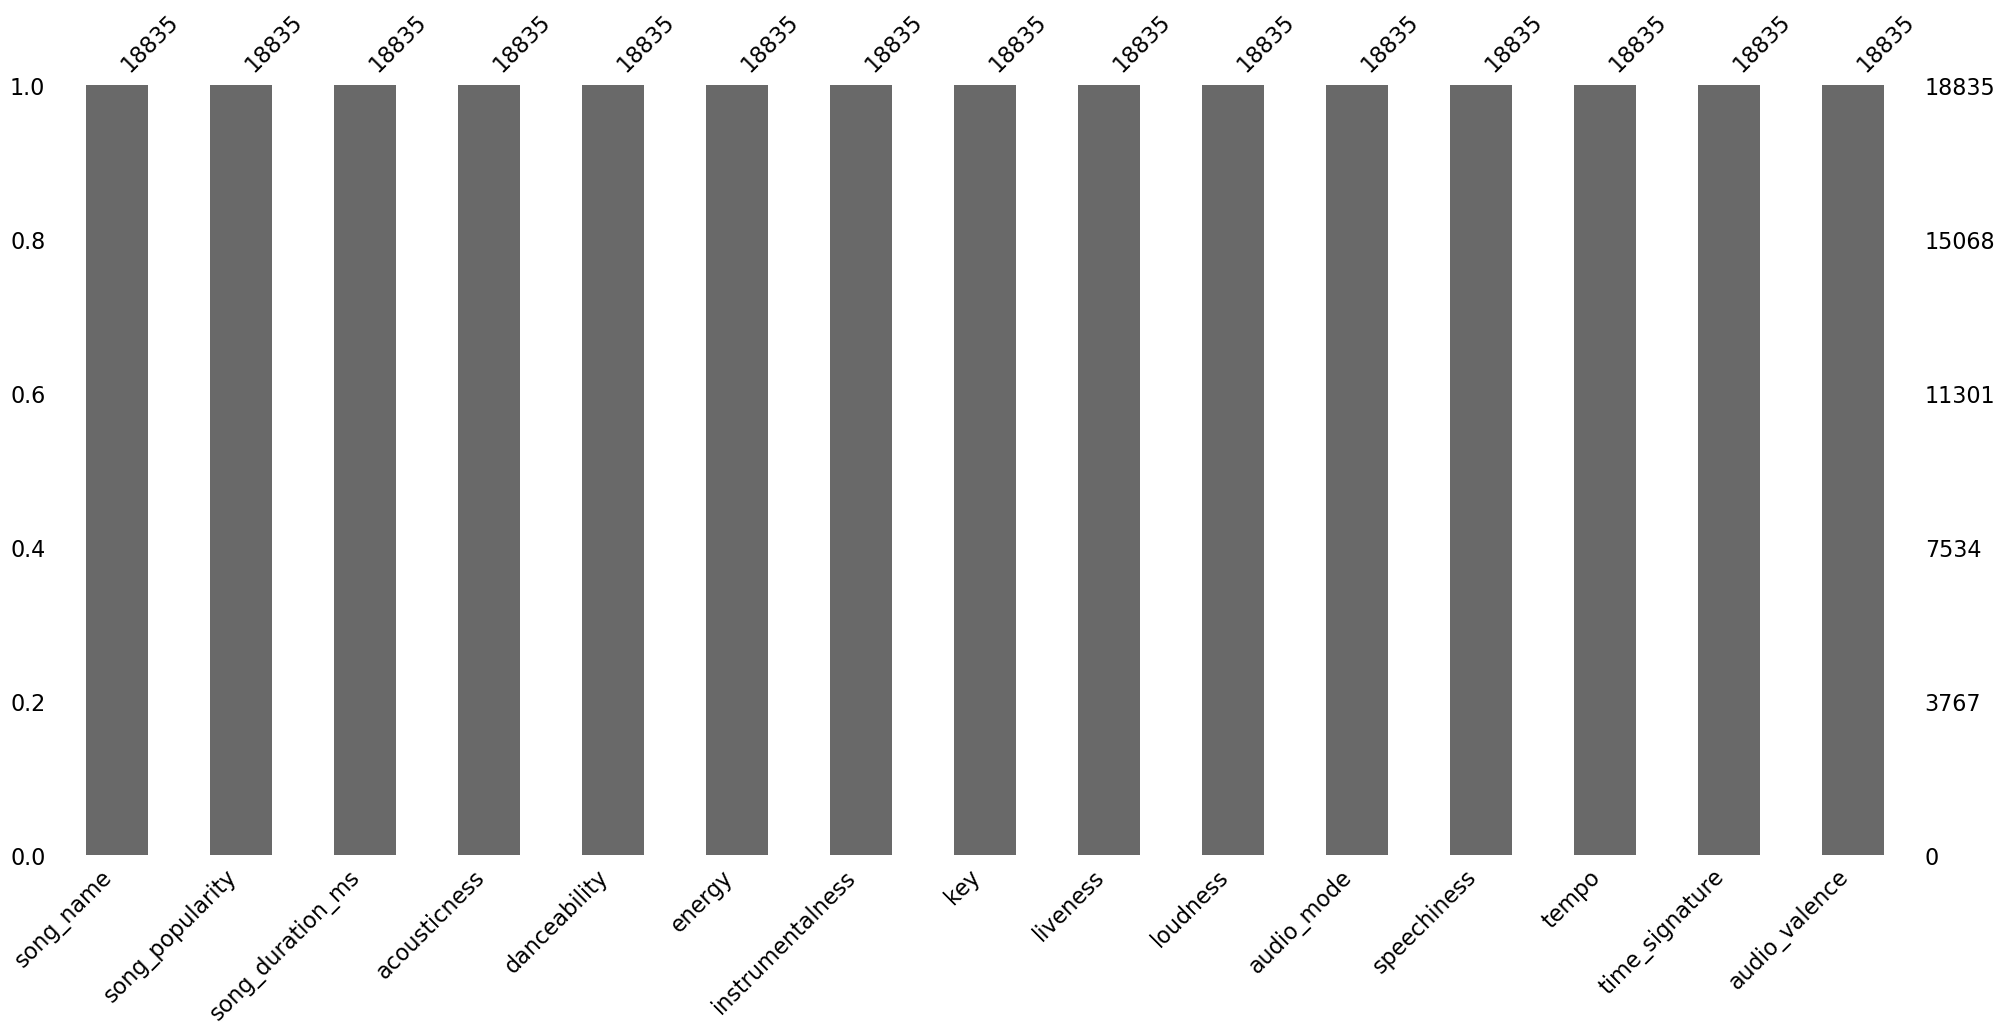

In [9]:
# Visualize missing data
msno.bar(df);

In [10]:
# creating a new column to group song popularity into four categories
df['popularity_category'] = pd.cut(df['song_popularity'], bins=[0, 25, 50, 75, 100],
                                   labels=['Low Popularity', 'Low-Mid Popularity', 'Mid-High Popularity', 'High Popularity'],
                                   include_lowest=True)

In [11]:
# checking values for new column
df['popularity_category'].value_counts()

popularity_category
Mid-High Popularity    8685
Low-Mid Popularity     5191
High Popularity        2577
Low Popularity         2382
Name: count, dtype: int64

In [12]:
# Converting millisecond to minutes and adding to new column
df['song_duration_min'] = round((df['song_duration_ms']/60000), 2)

In [13]:
# Dropping millisecond columns
df.drop(columns = 'song_duration_ms', inplace = True)

In [14]:
# checking values of new column
df['song_duration_min'].describe()

count    18835.000000
mean         3.636869
std          0.998144
min          0.200000
25%          3.070000
50%          3.520000
75%          4.050000
max         29.990000
Name: song_duration_min, dtype: float64

In [15]:
# which song was abour 30 min. long?
df.loc[df['song_duration_min'] == 29.99, :]

song_name  song_popularity  acousticness  danceability  energy  \
18147  Army Arrangement               23         0.468         0.737   0.849   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
18147           0.00187    0    0.0862    -5.587           0       0.0688   

        tempo  time_signature  audio_valence popularity_category  \
18147  98.162               4          0.686      Low Popularity   

       song_duration_min  
18147              29.99

In [16]:
df['loudness'].describe()

count    18835.000000
mean        -7.447435
std          3.827831
min        -38.768000
25%         -9.044000
50%         -6.555000
75%         -4.908000
max          1.585000
Name: loudness, dtype: float64

In [17]:
df.columns

Index(['song_name', 'song_popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'popularity_category', 'song_duration_min'],
      dtype='object')

## Part 3: **Exploratory Data Analysis (EDA)**
---

In [18]:
# What is the distribution of song popularity?
song_popularity_stat = df['song_popularity'].describe()
song_popularity_stat

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
25%         40.000000
50%         56.000000
75%         69.000000
max        100.000000
Name: song_popularity, dtype: float64

In [19]:
# Let's look at the columns in the dataset again
df.columns

Index(['song_name', 'song_popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'popularity_category', 'song_duration_min'],
      dtype='object')

In [20]:
df['audio_valence'].describe()

count    18835.000000
mean         0.527967
std          0.244632
min          0.000000
25%          0.335000
50%          0.527000
75%          0.725000
max          0.984000
Name: audio_valence, dtype: float64

### EDA: *Visualizing KNN*
---

Using `seaborn`, create a scatter plot using two features from the `DataFrame`: `'danceability'` and `'energy'`. Each dot should be colored according to its `'popularity_category'`.

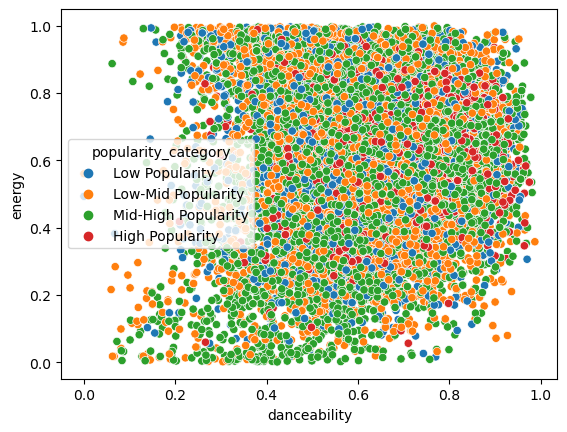

In [21]:
sns.scatterplot(data = df,
                x = 'danceability',
                y = 'energy',
                hue = 'popularity_category');

### EDA: *Pairplot*
---

Let's expand on the scatter plot created in the previous step. We can use `seaborn`'s `.pairplot()` method to create scatter plots using all of our features.

/Users/ann/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


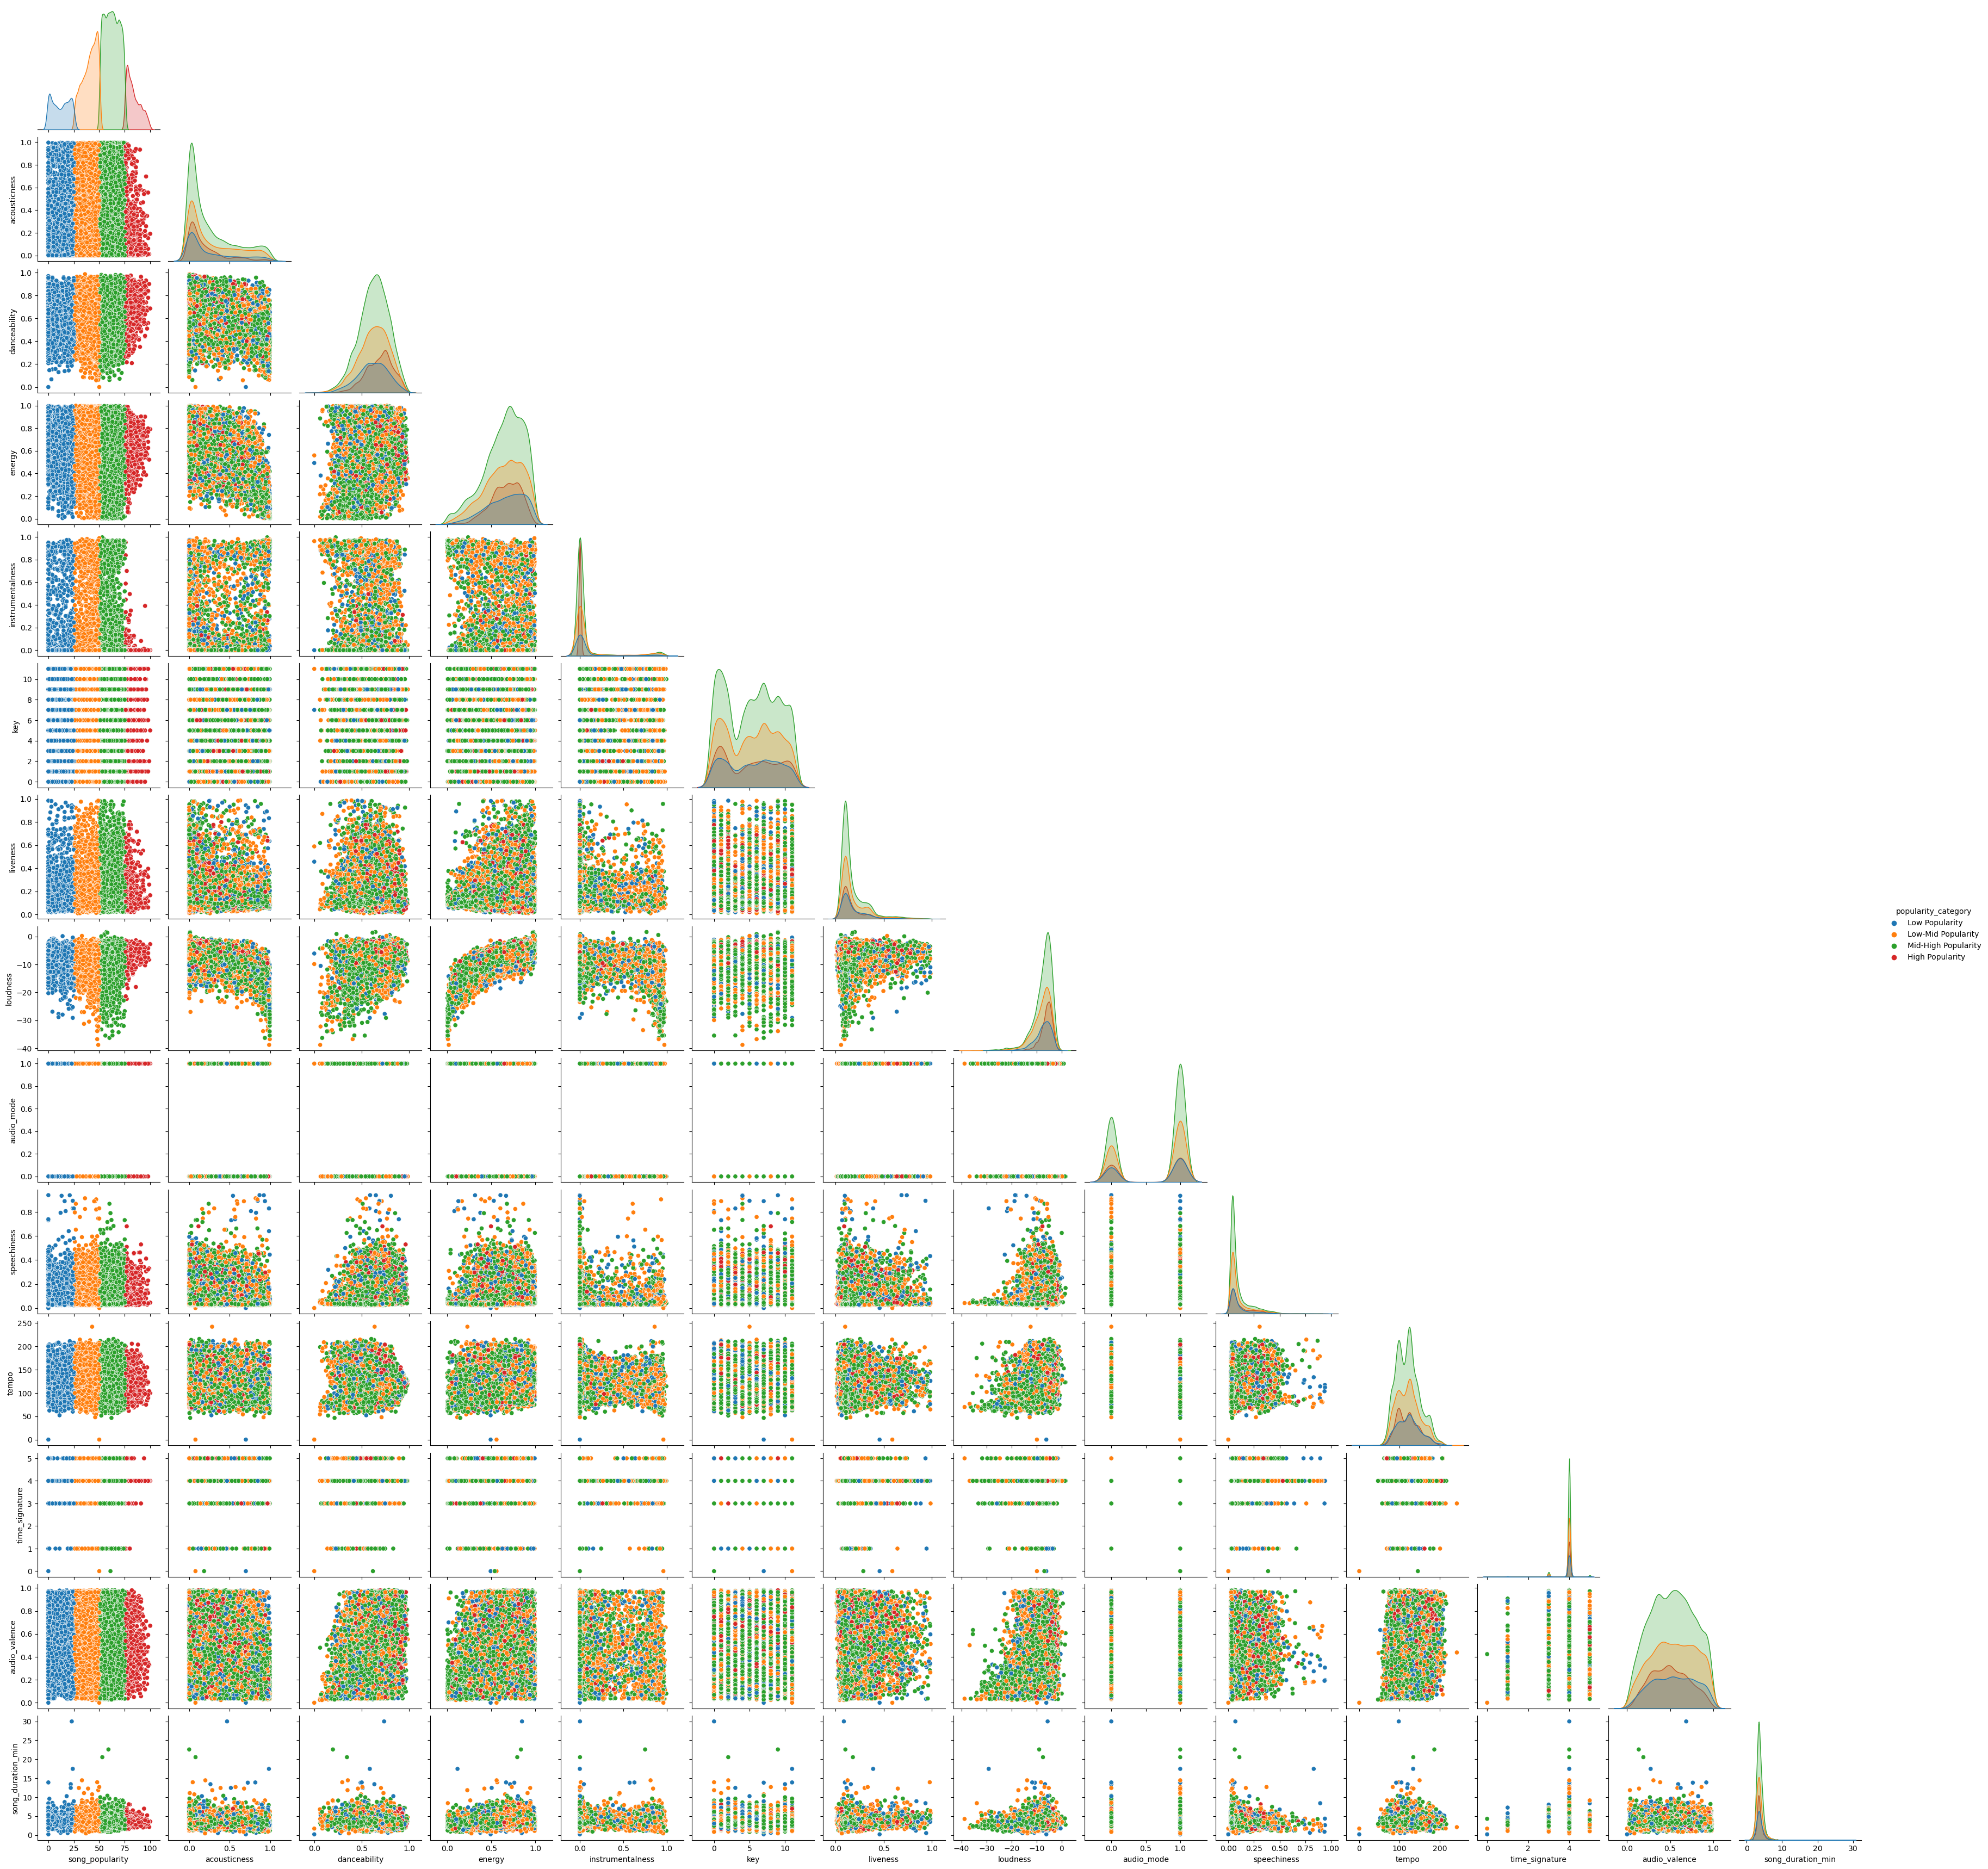

In [22]:
sns.pairplot(data = df, hue='popularity_category', corner = True);

## Part 4: **Modeling**
---

> **Fitting a classification model to predict the song popularity category. Use *all* numerical columns (other than the target) in your model to predict the song popularity category.**
> 1. First we must scale the data using `Standard Scaler`
> 2. Transform the data to `X_train` and `X_test`
> 3. Instantiate `KNeighborsClassifier`

### Baseline Model
---

In [23]:
df['popularity_category'].value_counts(normalize = True)

popularity_category
Mid-High Popularity    0.461110
Low-Mid Popularity     0.275604
High Popularity        0.136820
Low Popularity         0.126467
Name: proportion, dtype: float64

> **We want a model that will have a better accuracy score than 46.1%**

### Train/Test split
---

> Use the `train_test_split` function to split your data into a training set and a holdout set.

In [24]:
# Dropping 'song_name' column and 'song_popularity
X = df.drop(columns = ['song_name', 'song_popularity', 'popularity_category'])
y = df['popularity_category']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### StandardScaler
---
> `StandardScaler` is a preprocessing technique in machine learning that standardizes the features of a dataset by transforming them to have a mean of 0 and a standard deviation of 1. StandardScaler is particularly useful when working with algorithms (like KNN) that are sensitive to the scale of the input features, ensuring that all features contribute equally to the model's learning process and preventing any single feature from dominating due to its larger magnitude.
Because KNN is calculating the distance between neighbors, it's highly sensitive to the magnitude of your features.

In [26]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) # only FIT anything in our training set
X_test_sc = sc.transform(X_test)

In [27]:
X_test_sc

array([[ 1.79844679,  1.10766981, -1.14259498, ...,  0.13745415,
         0.68675707, -0.10160986],
       [ 2.17751993, -3.15519552, -2.89828316, ...,  0.13745415,
        -2.00048489,  0.36069657],
       [ 2.00015543, -0.49649691, -0.16487361, ...,  0.13745415,
         0.55998108, -0.78501936],
       ...,
       [-0.8670982 ,  0.43660405,  1.18241709, ...,  0.13745415,
         0.82989125, -0.81516978],
       [-0.69195945,  1.28662068, -0.09002412, ...,  0.13745415,
        -0.72822652, -0.0111586 ],
       [ 2.41400593, -2.33074331, -2.44778284, ...,  0.13745415,
        -1.67700165,  0.48129824]])

### Instantiate KNN
---

> For the `KNeighborsClassifier`, there a few important parameters to keep in mind:
> 1. `n_neighbors`: this is the "K" in KNN. The best K will change from problem to problem, but the default is 5.
> 2. `weights`: The neighbors can all have an equal vote (`uniform`), or the closer points can have a higher weighted vote (`distance`).
> 3. `p`: The distance metric. The default is Euclidean distance (2). Changing it to 1 is setting the distance to Manhattan.

**In the cell below, we are instantiating a `knn` model using the default parameters.**

In [28]:
knn = KNeighborsClassifier()

### Model fitting and evaluation
---

> Now that we know what we can expect from our KNN model, let's 
> 1. Fit the model to `X_train_sc`, `y_train`
> 2. Score it on `X_test_sc`, `y_test`

In [29]:
knn.fit(X_train_sc, y_train)
knn.score(X_train_sc, y_train)

0.6403794421633867

In [30]:
knn.score(X_test_sc, y_test)

0.4718623911658526

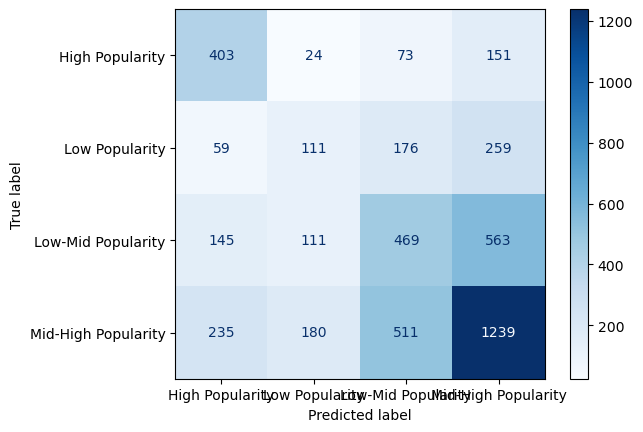

In [31]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

### The Model... or *A* Model?
---
> We let a default of $k$ = 5 earlier. Is that best? How do we know?

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sc, y_train)
knn.score(X_test_sc, y_test)

0.470163516670206

In [33]:
scores = []

for k in range(3, 52, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    acc_train = knn.score(X_train_sc, y_train)
    acc_test = knn.score(X_test_sc, y_test)
    scores.append({'k': k, 'acc_train': acc_train, 'acc_test': acc_test})
    
df_score = pd.DataFrame(scores)


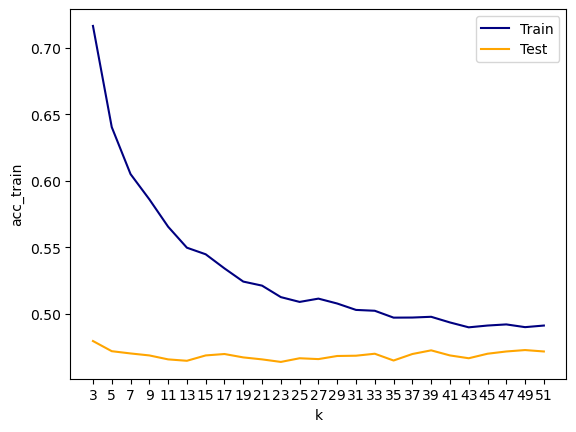

In [34]:
# Visualize this:
sns.lineplot(data = df_score, x = 'k', y = 'acc_train', c='navy', label='Train')
sns.lineplot(data = df_score, x = 'k', y = 'acc_test', c='orange', label='Test')
plt.xticks(range(3, 52, 2));

In [35]:
# Instantiate (again) & Refit (again)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# New training score
knn.score(X_train_sc, y_train)

0.7164802491858984

In [37]:
# New testing score
knn.score(X_test_sc, y_test)

0.4795073263962625

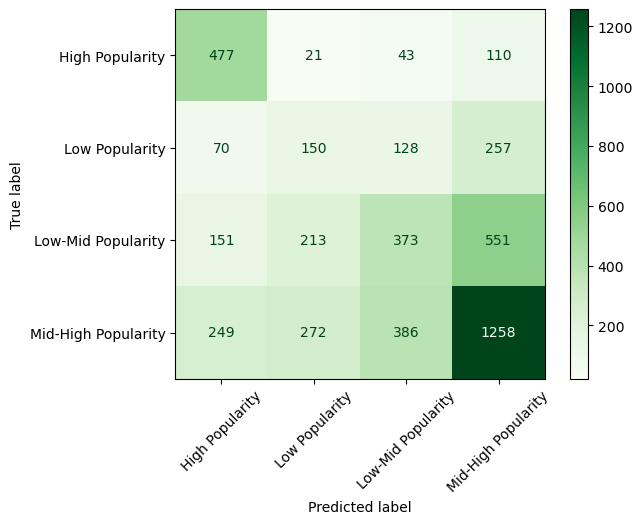

In [38]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Greens');
plt.xticks(rotation = 45);

### Trying Different Models
---

> Would different models work better than `KNeighborsClassifier`? There are _two_ other models we can use:
> 1. `LogisiticRegression`
> 2. `RandomForrest`

#### Logistic Regression
---

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [41]:
logr.score(X_train_sc, y_train)

0.4565340506866771

In [42]:
logr.score(X_test_sc, y_test)

0.4535994903376513

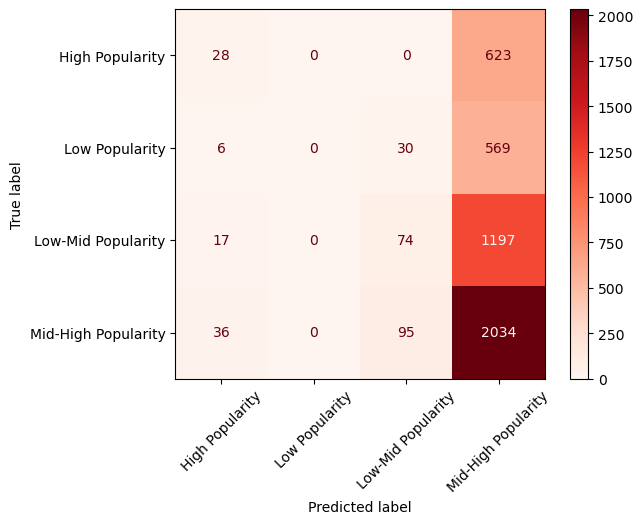

In [43]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');
plt.xticks(rotation = 45);

#### Random Forest
---

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [46]:
rf.score(X_train_sc, y_train)

0.9934163952994478

In [47]:
rf.score(X_test_sc, y_test)

0.6217880654066681

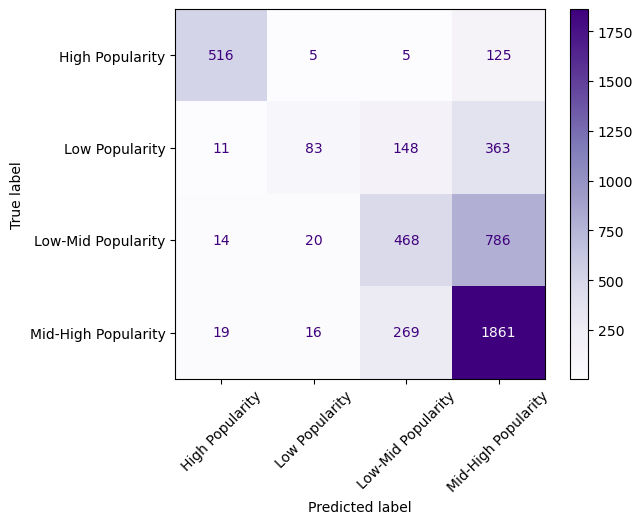

In [48]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');
plt.xticks(rotation = 45);

In [49]:
df.to_csv('../data/cleaned_song_data.csv', index = False)